In [1]:
%pylab inline
from matplotlib import pyplot as plt
from workflow.data import *
from workflow.features import *
import pandas as pd
import numpy as np
import seaborn as sns

from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

plt.tight_layout
plt.rcParams.update({'font.size': 22})
rc('xtick', labelsize=15) 
rc('ytick', labelsize=15) 
figure(figsize(10,7))

Populating the interactive namespace from numpy and matplotlib


In [2]:
# connect to SQL database

username = 'psam071'
host = 'localhost'
dbname = 'citibike'

db = create_engine('postgres://%s%s/%s' % (username,host,dbname))
con = None

con = psycopg2.connect(database = dbname, user = username, host = host)

# Querying Data and transforming it

In [3]:
# query stations from 2015 that existed at the beginning of the data
# collecting period
query_stations2015 = """
    SELECT DISTINCT a.id, name, lat, long, neighborhood, borough
    FROM features a
    LEFT JOIN stations b ON a.id = b.id
    LEFT JOIN neighborhoods c on a.id = c.id
    WHERE a.date = '2015-03-01'
        --AND tot_docks > 0
        AND borough = 'Manhattan'
    ORDER BY a.id;
"""

stations2015 = pd.read_sql_query(query_stations2015, con)
stations2015 = stations2015.dropna()

In [4]:
stations2015[stations2015.id == 494]

,id,name,lat,long,neighborhood,borough
171,494.0,W 26 St & 8 Ave,40.747348,-73.997236,Chelsea,Manhattan


In [18]:
stations2015.shape

(221, 6)

In [15]:
# most unbalanced stations
query_unbal_stations = """
    SELECT a.id, abs(a.bikes_in - a.bikes_out) as flux,
                 abs(a.rbikes_in - a.rbikes_out) as rflux,
                 a.bikes_in, a.bikes_out,                                 
            c.name, neighborhood, borough, long, lat
    FROM   (SELECT id, sum(bikes_out) as bikes_out, sum(bikes_in) as bikes_in,
                sum(rbikes_in) as rbikes_in, sum(rbikes_out) as rbikes_out
            FROM features
            GROUP BY id) a
    JOIN neighborhoods b ON a.id = b.id
    JOIN stations c on b.id = c.id
    ORDER BY rflux DESC
    LIMIT 100;
"""

df_unbal_stations = pd.read_sql_query(query_unbal_stations, con)
df_unbal_stations = df_unbal_stations[df_unbal_stations.id.isin(stations2015.id)]
# pl = df_unbal_stations.head(20).plot(kind = 'barh', x = 'name', y = 'flux', stacked=True)
# pl.invert_yaxis()

In [16]:
df_unbal_stations

,id,flux,rflux,bikes_in,bikes_out,name,neighborhood,borough,long,lat
0,492.0,19930.0,18320.0,129123.0,109193.0,W 33 St & 7 Ave,Midtown South,Manhattan,-73.990931,40.750200
2,517.0,17186.0,11934.0,83935.0,101121.0,Pershing Square South,Murray Hill,Manhattan,-73.977910,40.751581
3,477.0,10325.0,11522.0,156029.0,145704.0,W 41 St & 8 Ave,Clinton,Manhattan,-73.990026,40.756405
4,519.0,12451.0,10161.0,256714.0,269165.0,Pershing Square North,Murray Hill,Manhattan,-73.977706,40.751873
5,432.0,5794.0,9236.0,113240.0,107446.0,E 7 St & Avenue A,East Village,Manhattan,-73.983799,40.726218
6,529.0,14830.0,8517.0,90014.0,104844.0,W 42 St & 8 Ave,Clinton,Manhattan,-73.990985,40.757570
8,402.0,9196.0,7666.0,180692.0,171496.0,Broadway & E 22 St,Flatiron,Manhattan,-73.989551,40.740343
9,415.0,9596.0,7637.0,53450.0,43854.0,Pearl St & Hanover Square,Financial District,Manhattan,-74.009260,40.704718
10,514.0,9008.0,7446.0,142691.0,133683.0,12 Ave & W 40 St,Clinton,Manhattan,-74.002777,40.760875
11,426.0,8173.0,6696.0,190497.0,182324.0,West St & Chambers St,Tribeca,Manhattan,-74.013221,40.717548


In [17]:
# save list of top 100 unbalanced stations to pickle file for webapp
df_unbal_stations.to_pickle('websitetools/stations.pickle')

In [5]:
subset = df_unbal_stations.iloc[:100]

In [7]:
subset.id.sort_values()

100     116.0
31      128.0
39      150.0
92      151.0
139     152.0
23      153.0
68      161.0
116     164.0
142     167.0
45      168.0
141     195.0
56      229.0
75      251.0
99      257.0
18      260.0
112     267.0
87      281.0
34      284.0
74      285.0
109     293.0
30      303.0
49      304.0
29      309.0
136     311.0
83      312.0
79      317.0
140     335.0
61      336.0
13      337.0
72      347.0
        ...  
27      469.0
114     476.0
3       477.0
86      478.0
71      482.0
32      488.0
133     490.0
22      491.0
0       492.0
122     494.0
14      497.0
110     498.0
33      499.0
54      500.0
43      501.0
70      507.0
90      509.0
17      511.0
10      514.0
66      515.0
2       517.0
103     518.0
4       519.0
15      520.0
35      527.0
6       529.0
105     533.0
81      534.0
41     2010.0
113    2022.0
Name: id, Length: 100, dtype: float64

In [13]:
query_check_stations = '''
    SELECT DISTINCT id from features_subset;
'''

st_list = pd.read_sql_query(query_check_stations, con)

In [14]:
st_list.sort_values('id')

,id
3,128.0
81,150.0
57,151.0
24,153.0
51,161.0
68,168.0
30,217.0
85,225.0
45,229.0
50,243.0


In [7]:
def dfcol_into_sqllist(df, col):
    # converts a column in a pandas dataframe into a string for sql queries
    listy = list(df[col].unique())
    listy = listy[0:10]
    return "(" + str(listy)[1:-1] + ")"

string_of_unbal_stations = str(list(df_unbal_stations.id.unique()))[1:-1]
list_of_unbal_stations = list(df_unbal_stations.id)
df_unbal_stations.id.unique().shape

(221,)

In [8]:
# look at the patterns for the rebalanced stations
# make sure tot_docks > 0 (especially when calculating bikes available)

ids_to_see = dfcol_into_sqllist(df_unbal_stations, 'id')
# ids_to_see = '(' + str(['72'])[1:-1] + ')'

query = """
    SELECT a.id, a.date, a.hour, bikes_out, bikes_in, dayofweek, month, is_weekday,
            is_holiday, rbikes_out, rbikes_in, tot_docks, avail_bikes, avail_docks,
            precip, temp, long, lat, neighborhood, borough
    FROM features a
    LEFT JOIN weather b ON a.date = b.date AND a.hour = b.hour
    LEFT JOIN stations c ON a.id = c.id
    LEFT JOIN neighborhoods d ON a.id = d.id
    WHERE a.id in {}
        AND tot_docks > 0
        AND borough = 'Manhattan'
    --WHERE tot_docks > 0
    ORDER BY a.id, a.date, a.hour;
""".format(ids_to_see)

df = pd.read_sql_query(query, con)
df.date = pd.to_datetime(df.date)

In [9]:
# make new features (percentages)`
df = new_features(df)


In [10]:
# split data into 2015 (train) and 2016 (test) data
# 
data_cols = ['id', 'long', 'lat', 'hour', 'month', 'dayofweek',
             'is_weekday', 
             'is_holiday', 'precip', 'temp', 'pct_avail_bikes', 
             'pct_avail_docks']#, 'pct_avail_docks']
# df = make_categorical(df, ['id', 'hour', 'month', 'is_weekday', 'is_holiday'])
hist_cols = ['mean_flux', 'yest_flux', 'last_week_flux']

df2015 = df[(df.date.dt.year == 2015)]
df2016 = df[(df.date.dt.year == 2016)]

# Prepare pipeline

### TPOT Regressor

In [14]:
# tpot regressor

from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

# data = df[data_cols + hist_cols].sort_index()
# target = df.pct_flux

# X_train, X_test, y_train, y_test = train_test_split(data, target, 
#                                                     train_size = 0.75, test_size = 0.25)

X_train = df2015[data_cols]
y_train = df2015.pct_flux

X_test = df2016[data_cols]
y_test = df2016.pct_flux


reg = TPOTRegressor(generations=2, population_size = 5, verbosity=2)
reg.fit(X_train, y_train)
pred = tpot.predict(X_test)

Optimization Progress:  67%|██████▋   | 10/15 [02:08<03:11, 38.37s/pipeline]

Generation 1 - Current best internal CV score: 0.0279967764342


Generation 2 - Current best internal CV score: 0.0279967764342

Best pipeline: GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.99, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=DEFAULT, GradientBoostingRegressor__max_depth=9, GradientBoostingRegressor__max_features=0.45, GradientBoostingRegressor__min_samples_leaf=3, GradientBoostingRegressor__min_samples_split=4, GradientBoostingRegressor__n_estimators=DEFAULT, GradientBoostingRegressor__subsample=0.1)


### RandomForestRegressor

In [ ]:
# from sklearn.ensemble import ExtraTreesRegressor
# X_train = df2015[data_cols + hist_cols]
# y_train = df2015.pct_flux

# X_test = df2016[data_cols + hist_cols]
# y_test = df2016.pct_flux

# reg = ExtraTreesRegressor(min_samples_leaf=11, min_samples_split=3, max_features = 0.85, n_estimators = 100,
#                             n_jobs=-1)
# reg.fit(X_train, y_train)
# pred = reg.predict(X_test)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = [{'min_samples_leaf': [12, 14, 16],
          'min_samples_split': [6, 8, 10],
          'max_features': [0.85,0.95,1.]}]


X_train = df2015[data_cols]
y_train = df2015.pct_flux#.apply(flux_conditions, 0.15)

X_test = df2016[data_cols]
y_test = df2016.pct_flux#.apply(flux_conditions, 0.15)

# reg = GridSearchCV(RandomForestRegressor(), params, cv=2, scoring = 'neg_mean_squared_error')
reg = RandomForestRegressor(min_samples_leaf=16, min_samples_split=6, max_features = 0.95,
                            n_jobs=-1)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)


In [20]:
reg.best_params_

{'max_features': 0.95, 'min_samples_leaf': 16, 'min_samples_split': 6}

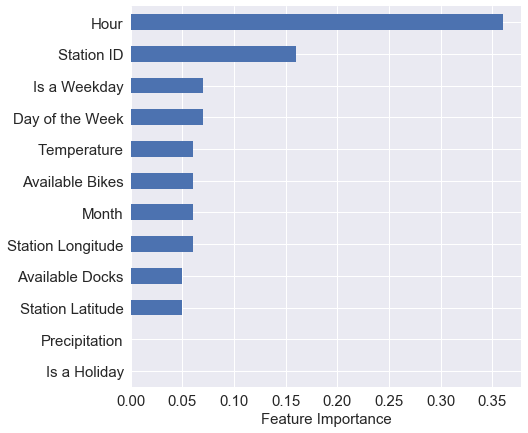

In [12]:
reg.feature_importances_.round(2)
importances = list(reg.feature_importances_.round(2))

features_dict = {}
for importance, col in zip(importances, data_cols):
    features_dict[col] = importance

feature_imp = pd.Series(features_dict)
values_to_plot = feature_imp.sort_values()
values_to_plot.rename(index = {'id':'Station ID',
                                 'hour': 'Hour',
                                 'pct_avail_bikes': 'Available Bikes',
                                 'dayofweek': 'Day of the Week',
                                 'is_weekday': 'Is a Weekday',
                                 'temp': 'Temperature',
                                 'precip': 'Precipitation',
                                'month': 'Month',
                              'lat': 'Station Latitude',
                              'long': 'Station Longitude',
                              'pct_avail_docks': 'Available Docks',
                              'is_holiday': 'Is a Holiday'}, inplace = True)
values_to_plot.plot(kind = 'barh', figsize=(7,7))
xlabel('Feature Importance', fontsize = 15)

In [ ]:
df2015.shape

In [ ]:
stations2015[stations2015.id == 517]

# Test Model

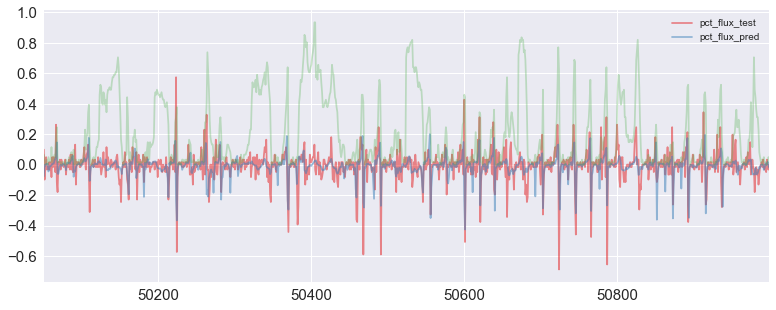

In [31]:
def merge_pred_test(pred, y_test):
    tests = pd.DataFrame()
    tests['pct_flux_test'] = y_test.reset_index().pct_flux
    tests['pct_flux_pred'] = pred
    return tests

def plot_pred_test(test,X_test):
    cmap= sns.color_palette('Set1')
    sns.set_palette(cmap)
    tests.iloc[50050:51000].plot(figsize = (13,5), alpha = 0.5)
    X_test.reset_index().iloc[50050:51000].pct_avail_bikes.plot(alpha = 0.3)
    
   
tests = merge_pred_test(pred, y_test)
# tests.pct_flux_test = tests.pct_flux_test.apply(flux_conditions, 0.2)
# tests.pct_flux_pred = tests.pct_flux_pred.apply(flux_conditions, 0.2)
plot_pred_test(tests, X_test)

In [ ]:
def merge_test_pred(X, y, pred):
    pred_series = pd.Series(pred)
    X = X.reset_index()
    X['pct_flux_test'] = y.reset_index().pct_flux
    X['pct_flux_pred'] = pred_series
    return X

df_compare = merge_test_pred(X_test, y_test, pred)
    

In [ ]:
df_compare.head()

In [ ]:
ids_to_see

In [ ]:
plot_by_hour(df_compare,['pct_flux_test','pct_flux_pred', 'hour'], 477, weekday = 1)
suptitle('Bike Activity for Station {} (Weekday)'.format(477))

In [ ]:
cols  = ['pct_flux_pred', 'pct_flux_test', 'hour']
weekday = 1
dock_id = 477
grps = df_compare.groupby(['id','is_weekday', 'hour']).mean().reset_index()
grps_std = df_compare.groupby(['id','is_weekday', 'hour']).std().reset_index()
cond = (grps.is_weekday ==  weekday) & (grps.id == dock_id)
# grps[cond][cols].set_index('hour').plot()

hr_profile = grps[cond][cols].set_index('hour')
hr_profile_errors = grps_std[cond][cols].set_index('hour')

x = hr_profile.pct_flux_pred
error = hr_profile_errors.pct_flux_pred

ax = x.plot(linewidth = 3, label = '2016 Prediction')
fill_between(list(x.index), list(x - error), list(x + error), alpha = 0.2)
hr_profile.pct_flux_test.plot(label = '2016 Data', linewidth = 3)
labels = ['12 AM', '5 AM', '10 AM', '3 PM', '8 PM']
ax.set_xticklabels(labels)


xlabel('Time of Day', size = 20)
legend(loc = 2, prop = {'size':15})
ylim([-0.45,0.45])
suptitle('2016 Bike Flow for Station {} (Weekday)'.format(477))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def scoring_metrics(predicted, labeled):
    mse = mean_squared_error(predicted, labeled)
    r2 = r2_score(predicted, labeled)
    
    print 'MSE: {}'.format(mse)
    print 'R2: {}'.format(r2)
    
    
scoring_metrics(hr_profile.pct_flux_pred, hr_profile.pct_flux_test)
#     return mse, r2

# mean_squared_error(y_test, pred)
# r2_score(y_test, pred)
# explained_variance_score(y_test, pred)
# RegressorMixin.score(X_test, y_test)

# Miscellaneous Plotting

In [ ]:
# prediction/observation plot

line = linspace(-1,1, num = 50)

fig = plt.figure(figsize = (10,10))
pl = fig.add_subplot(111)
pl.scatter(pred, y_test, alpha = 0.1)
pl.plot(line, line, c = 'k', linestyle = '--')
xlabel('Predicted',fontsize = 15)
ylabel('Observed',fontsize = 15)


In [ ]:
# queries the entire features table to calculate pct_flux
ids_to_see = dfcol_into_sqllist(df_unbal_stations, 'id')

query = """
    SELECT a.id, a.date, a.hour, bikes_out, bikes_in, dayofweek, month, is_weekday,
            is_holiday, rebal_net_flux, tot_docks, avail_bikes, avail_docks,
            precip, snow, temp, c.long, c.lat
    FROM features a
    LEFT JOIN weather b ON a.date = b.date AND a.hour = b.hour
    LEFT JOIN stations c ON a.id = c.id
    WHERE tot_docks > 0 AND a.id in {}
    ORDER BY a.id, a.date, a.hour;
""".format(ids_to_see)

df = pd.read_sql_query(query, con)
df.date = pd.to_datetime(df.date)
df = new_features(df)

In [ ]:
# histogram of pct_flux compared to normal distribution

from scipy.stats import norm
x_axis = np.arange(-1,1,0.001)

df.pct_flux.plot(kind = 'hist', logy = True, bins=400, normed = True, alpha = 0.5)
plot(x_axis, norm.pdf(x_axis, df.pct_flux.mean(), df.pct_flux.std()))
xlim([-0.5,0.5])
ylim([0.001, None])
xlabel('Bike Flow', fontsize = 15)
ylabel('Frequency', fontsize = 15)

In [ ]:
# df['hours12'] = pd.to_datetime(df.hour, format='%H').dt.strftime('%I %p')

cols  = ['pct_flux', 'pct_avail_bikes', 'hour']
weekday = 1
dock_id = 477
grps = df.groupby(['id','is_weekday', 'hour']).mean().reset_index()
cond = (grps.is_weekday == weekday) & (grps.id == dock_id)
plotter = grps[cond][cols].sort_values('hour').set_index('hour')

plot1 = plotter['pct_avail_bikes'].plot(c = 'steelblue', label = 'Available Bikes')
# change ticklabels
# labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['12 AM', '5 AM', '10 AM', '3 PM', '8 PM']
plot1.set_xticklabels(labels)

plot2 = plotter['pct_flux'].plot(c = 'r', label = 'Flow')
legend(loc = 4, prop = {'size':15})
xlabel('Time of Day', fontsize = 15)
ylim([-.45, 0.7])


suptitle('Bikes Activity for Station {} (Weekday)'.format(dock_id))

# grps.xs((dock_id,weekday), level=('id', 'is_weekday'))[cols].plot()

In [ ]:
grps = df.groupby(['id','dayofweek', 'hour']).mean().reset_index()
cond = (grps.dayofweek == 1) & (grps.id == 477)
# grps[cond][['pct_flux', 'hour']].set_index('hour').head()
grps.dayofweek.head()

In [ ]:
def plot_by_hour(df, cols, dock_id, dayofweek = 0, weekday = None):
    #plot hourly profile for any bike for any day
    if weekday == 1 or weekday == 0:
        grps = df.groupby(['id','is_weekday', 'hour']).mean().reset_index()
        cond = (grps.is_weekday == weekday) & (grps.id == dock_id)
        grps[cond][cols].set_index('hour').plot()
    else:
        grps = df.groupby(['id','dayofweek', 'hour']).mean()
        cond = (grps.dayofweek == dayofweek) & (grps.id == dock_id)
        grps[cond][cols].set_index('hour').plot()
#         grps.xs((dock_id, dayofweek), level=('id', 'dayofweek'))[cols].plot()
    plt.xlabel('Hour', size = 20)
    legend(loc = 'best', prop = {'size':15})

In [ ]:
unbal_stations_list = df_unbal_stations[df_unbal_stations.id.isin(stations2015.id)].id
for id in list(unbal_stations_list)[0:5]:
    plot_by_hour(df,['pct_flux', 'pct_avail_bikes'], id, dayofweek=3)
    suptitle('Bike Activity for station {}'.format(id))

In [ ]:
plot_by_hour(df,['pct_flux', 'hour'], 477, weekday = 1)
suptitle('Bike Activity for station {} (Weekday)'.format(529))

In [ ]:
def flux_by_hour(df, cols, dock_id, day = 0, weekday = None):
    #plot hourly profile for any bike for any day
    if weekday == 1 or weekday == 0:
        grps = df.groupby(['id','is_weekday', 'hour']).mean().reset_index()
        cond = ((grps.is_weekday == weekday) & (grps.id == dock_id))
        return grps[cond][cols]
    else:
        grps = df.groupby(['id','dayofweek', 'hour']).mean().reset_index()
        cond = ((grps.dayofweek == day) & (grps.id == dock_id))
        return grps[cond][cols]

In [ ]:
flux_by_hour(df,['pct_flux','hour'], 477, day = 1)

In [ ]:
plot_by_hour(df,['pct_flux','hour'], 477, dayofweek = 1)
suptitle('Bike Activity for station {} (Weekend)'.format(529))

In [ ]:
stations2015[stations2015.id == 529]

In [ ]:
import pickle

PICKLE_FILENAME = 'regressor.pkl'

with open(PICKLE_FILENAME, "r") as reg_infile:
        reg = pickle.load(reg_infile)
        
reg

In [ ]:
# most unbalanced stations
query_unbal_stations_byhr = """
    SELECT a.id,  a.hour, abs(a.bikes_in - a.bikes_out) as flux,
                 abs(a.rbikes_in - a.rbikes_out) as rflux,
                 a.bikes_in, a.bikes_out,
                 c.name, neighborhood, borough, long, lat
    FROM   (SELECT id, hour, sum(bikes_out) as bikes_out, sum(bikes_in) as bikes_in,
                sum(rbikes_in) as rbikes_in, sum(rbikes_out) as rbikes_out
            FROM features
            GROUP BY id, hour) a
    JOIN neighborhoods b ON a.id = b.id
    JOIN stations c on b.id = c.id
    ORDER BY flux DESC;
"""

df_unbal_stations_byhr = pd.read_sql_query(query_unbal_stations_byhr, con)
df_unbal_stations_byhr = df_unbal_stations_byhr[df_unbal_stations_byhr.id.isin(stations2015.id)]

In [ ]:
df_unbal_stations_byhr.sort_values(['id','hour'])

In [ ]:

aggregators = {'bikes_in': 'sum', 'bikes_out': 'sum', 'long': 'max', 'lat': 'max'}
df_morn = df_unbal_stations_byhr[df_unbal_stations_byhr.hour.isin([7,8,9])].groupby('id').agg(aggregators)

In [ ]:
df_morn.head()

In [ ]:
# map plot of difference between 8 am and 6 pm bike activity

aggregators = {'bikes_in': 'sum', 'bikes_out': 'sum'}
morn_cond = df_unbal_stations_byhr.hour.isin([8])
even_cond = df_unbal_stations_byhr.hour.isin([17])
grp_cols = ['id', 'lat', 'long', 'name']
df_morn = df_unbal_stations_byhr[morn_cond].groupby(grp_cols).agg(aggregators).reset_index()
df_even = df_unbal_stations_byhr[even_cond].groupby(grp_cols).agg(aggregators).reset_index()

fig = plt.figure(figsize = (15,15))
pl1 = fig.add_subplot(111)
pl1.scatter(df_morn.long, df_morn.lat,
           s = df_morn.bikes_out/50, color = 'r', alpha=0.9,
           label = 'bikes out at 8 am')
pl1.scatter(df_even.long, df_even.lat,
           s = df_even.bikes_out/50, color = 'g', alpha=0.6,
           label = 'bikes out at 6 pm')

plt.axes().set_aspect('equal')
plt.legend(loc='best')

In [ ]:
df_morn.head()

In [ ]:
import folium

# norm = Normalize(start_station['trip count'].min(), start_station['trip count'].max())
# Get dark tileset from CartoBD (https://cartodb.com/basemaps)
tileset = r'http://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}.png'

station_map = folium.Map(location = [40.73, -73.985], width = 400, height = 700,
                        tiles = tileset,
                        attr = '&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, &copy; <a href="http://cartodb.com/attributions">CartoDB</a>',
                        zoom_start = 13)


for index, row in df_morn.iterrows():
    morn_color = 'red' #rgb2hex(cm.YlOrRd(norm(row['trip count'])))
    folium.CircleMarker(
        location = [row['lat'], row['long']],
        popup = row['name'],
        radius = sqrt(row['bikes_out'])/15,
        color = None, fill_color = morn_color).add_to(station_map)
    
for index, row in df_even.iterrows():
    green_color = 'green' #rgb2hex(cm.YlOrRd(norm(row['trip count'])))
    folium.CircleMarker(
        location = [row['lat'], row['long']],
        popup = row['name'],
        radius = sqrt(row['bikes_out'])/15,
        color = None, fill_color = green_color).add_to(station_map)
    
station_map    
# station_map.save('station_map.html')

In [ ]:
station_map

In [ ]:
# map plot of flow activity vs. rebalancing activity

fig = plt.figure(figsize = (10,15))
pl1 = fig.add_subplot(111)
pl1.scatter(df_unbal_stations.long, df_unbal_stations.lat,
           s = df_unbal_stations.flux/25, color = 'k', alpha=0.9,
           label = 'total bike flow')
pl1.scatter(df_unbal_stations.long, df_unbal_stations.lat,
           s = df_unbal_stations.rflux/25, color = 'y', alpha=0.6,
           label = 'total rebalancing flow')

plt.axes().set_aspect('equal')
plt.legend(loc='best')

In [ ]:
hrs = df.hours12.sort_values().unique()
hrs

In [ ]:
pd.to_datetime(df.hour, format='%H').dt.strftime('%I %p')

## Sample Queries

In [ ]:
# find the most active stations by bikes_out
query_stations_out = """
    SELECT a.id, bikes_out, c.name, neighborhood, borough
    FROM   (SELECT id, sum(bikes_out) as bikes_out
            FROM features
            GROUP BY id) a
    JOIN neighborhoods b ON a.id = b.id
    JOIN stations c on b.id = c.id
    ORDER BY bikes_out DESC;
"""

df_stations_out = pd.read_sql_query(query_stations_out, con)
df_stations_out.head(20)

In [ ]:
# find the most active stations by bikes_in
query_stations_in = """
    SELECT a.id, bikes_in, c.name, neighborhood, borough
    FROM   (SELECT id, sum(bikes_in) as bikes_in
            FROM features
            GROUP BY id) a
    JOIN neighborhoods b ON a.id = b.id
    JOIN stations c ON b.id = c.id
    ORDER BY bikes_in DESC;
"""

df_stations_in = pd.read_sql_query(query_stations_in, con)
df_stations_in.head(20)

In [ ]:
# find the most active neighborhoods by bikes_out
query_hoods_out = """
        SELECT sum(a.bikes_out) as bikes_out, 
                b.neighborhood, b.borough
        FROM features a
        JOIN neighborhoods b on a.id = b.id
        GROUP BY borough, neighborhood
        ORDER BY bikes_out DESC;
"""

df_hoods_out = pd.read_sql_query(query_hoods_out, con)
df_hoods_out.head(20)

In [ ]:
# find the most active neighborhoods by bikes_in
query_hoods_in = """
        SELECT sum(a.bikes_in) as bikes_in, 
                b.neighborhood, b.borough
        FROM features a
        JOIN neighborhoods b on a.id = b.id
        GROUP BY borough, neighborhood
        ORDER BY bikes_in DESC;
"""

df_hoods_in = pd.read_sql_query(query_hoods_in, con)
df_hoods_in.head(20)

In [ ]:
# find the most unbalanced neighborhoods
query_hoods_in = """
        SELECT sum(a.bikes_in - a.bikes_out) as flux, 
                b.neighborhood, b.borough
        FROM features a
        JOIN neighborhoods b on a.id = b.id
        GROUP BY borough, neighborhood
        ORDER BY flux DESC;
"""

df_hoods_in = pd.read_sql_query(query_hoods_in, con)
df_hoods_in.head(20)

# Make dummy variables

In [ ]:
unique_values = [len(unique(df.iloc[:,i])) for i in xrange(df.shape[1])]
plt.bar(range(df.shape[1]), unique_values, width = 1, align='edge')

In [ ]:
# def dummies(col_name):
#     unique = sorted(data[col_name].unique())
#     return pd.get_dummies(unique)

# dummy_hour = pd.get_dummies(dummies('hour'))
# dummy_dayofweek = pd.get_dummies(dummies('dayofweek'))
# dummy_month = pd.get_dummies(dummies('month'))

In [ ]:
cat_data = df[['hour', 'dayofweek', 'month']]
dummy_hr = pd.get_dummies(cat_data['hour']).rename(columns = lambda x: 'hour' + '{:02}'.format(x))
dummy_dow = pd.get_dummies(cat_data['dayofweek']).rename(columns = lambda x: 'day' + '{:02.0f}'.format(x))
dummy_mo = pd.get_dummies(cat_data['month']).rename(columns = lambda x: 'month' + '{:02.0f}'.format(x))

In [ ]:
dummy_df = pd.concat([df, dummy_hr, dummy_dow, dummy_mo], axis = 1)
dummy_df.drop(['hour', 'month', 'dayofweek'], axis=1, inplace=True)
dummy_df.drop(['id', 'date', 'bikes_out', 'bikes_in', 'rebal_net_flux',
              'avail_bikes', 'avail_docks', 'tot_docks', 'flux'], axis = 1, inplace = True)
dummy_df.head()